<a href="https://colab.research.google.com/github/thenorthner/Advanced-Net-Load-Forecasting-AI/blob/main/Advanced_Net_Load_Forecasting_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Plant_1_Generation_Data.csv to Plant_1_Generation_Data.csv
Saving Plant_1_Weather_Sensor_Data.csv to Plant_1_Weather_Sensor_Data.csv
Saving Plant_2_Generation_Data.csv to Plant_2_Generation_Data.csv
Saving Plant_2_Weather_Sensor_Data.csv to Plant_2_Weather_Sensor_Data.csv
User uploaded file "Plant_1_Generation_Data.csv" with length 4839076 bytes
User uploaded file "Plant_1_Weather_Sensor_Data.csv" with length 287847 bytes
User uploaded file "Plant_2_Generation_Data.csv" with length 5805157 bytes
User uploaded file "Plant_2_Weather_Sensor_Data.csv" with length 301443 bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load kar rahe hain
# Note: Agar files kisi folder mein hain to path change kar lena (e.g., 'folder_name/filename.csv')
plant1_gen = pd.read_csv('Plant_1_Generation_Data.csv')
plant1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

plant2_gen = pd.read_csv('Plant_2_Generation_Data.csv')
plant2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Data check karte hain (First 5 rows aur Columns ke naam)
print("--- Plant 1 Generation Data ---")
print(plant1_gen.head())
print("\n--- Plant 1 Weather Data ---")
print(plant1_weather.head())

# Columns ke naam check karna zaroori hai merging ke liye
print("\nColumns in Generation Data:", plant1_gen.columns)
print("Columns in Weather Data:", plant1_weather.columns)

--- Plant 1 Generation Data ---
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

--- Plant 1 Weather Data ---
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2T

In [3]:
# 1. Date Format Sahi karna
# dayfirst=True isliye kyunki Generation data mein date pehle hai (15-05-2020)
plant1_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], dayfirst=True)
plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'])

# 2. Total Power Calculate karna (Aggregation)
# Ek time par saare inverters ka sum chahiye
df_gen_grouped = plant1_gen.groupby('DATE_TIME')[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].sum().reset_index()

# 3. Weather Data ke saath Merge karna
# Common column 'DATE_TIME' par dono tables ko jod rahe hain
df_plant1 = pd.merge(df_gen_grouped, plant1_weather, on='DATE_TIME', how='inner')

# Unnecessary columns drop kar dete hain (PLANT_ID, SOURCE_KEY ab kaam ke nahi)
df_plant1 = df_plant1.drop(columns=['PLANT_ID', 'SOURCE_KEY'])

# Check Output
print("--- Final Merged Data Shape ---")
print(df_plant1.shape)
print("\n--- First 5 Rows ---")
print(df_plant1.head())

--- Final Merged Data Shape ---
(3157, 8)

--- First 5 Rows ---
            DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15 00:00:00       0.0       0.0          0.0  143581676.0   
1 2020-05-15 00:15:00       0.0       0.0          0.0  143581676.0   
2 2020-05-15 00:30:00       0.0       0.0          0.0  143581676.0   
3 2020-05-15 00:45:00       0.0       0.0          0.0  143581676.0   
4 2020-05-15 01:00:00       0.0       0.0          0.0  150761642.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            25.184316           22.857507          0.0  
1            25.084589           22.761668          0.0  
2            24.935753           22.592306          0.0  
3            24.846130           22.360852          0.0  
4            24.621525           22.165423          0.0  


In [4]:
# --- Processing Plant 2 ---

# 1. Date Format Conversion
# Note: Plant 2 ka format kabhi-kabhi alag hota hai, isliye hum standard convert use karenge
plant2_gen['DATE_TIME'] = pd.to_datetime(plant2_gen['DATE_TIME'])
plant2_weather['DATE_TIME'] = pd.to_datetime(plant2_weather['DATE_TIME'])

# 2. Total Power Calculate (Aggregation)
# Saare inverters ka total power nikal rahe hain
df_gen_grouped_2 = plant2_gen.groupby('DATE_TIME')[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].sum().reset_index()

# 3. Merge with Weather Data
df_plant2 = pd.merge(df_gen_grouped_2, plant2_weather, on='DATE_TIME', how='inner')

# Extra columns hata dete hain
df_plant2 = df_plant2.drop(columns=['PLANT_ID', 'SOURCE_KEY'])

# --- Output Check ---
print("--- Plant 2 Merged Data Shape ---")
print(df_plant2.shape)
print("\n--- First 5 Rows (Plant 2) ---")
print(df_plant2.head())

--- Plant 2 Merged Data Shape ---
(3259, 8)

--- First 5 Rows (Plant 2) ---
            DATE_TIME  DC_POWER  AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15 00:00:00       0.0       0.0  48899.938095  1.418960e+10   
1 2020-05-15 00:15:00       0.0       0.0  28401.000000  1.418960e+10   
2 2020-05-15 00:30:00       0.0       0.0  28401.000000  1.418960e+10   
3 2020-05-15 00:45:00       0.0       0.0  28401.000000  1.418960e+10   
4 2020-05-15 01:00:00       0.0       0.0  26516.000000  1.418960e+10   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            26.880811           24.421869          0.0  
2            26.682055           24.427290          0.0  
3            26.500589           24.420678          0.0  
4            26.596148           25.088210          0.0  


In [5]:
# --- 1. Combine Plant 1 & Plant 2 ---
# Hum 'inner' join use karenge taaki wahi time lein jaha dono ka data available ho
df_master = pd.merge(df_plant1, df_plant2, on='DATE_TIME', suffixes=('_P1', '_P2'))

# --- 2. Create Total Solar Generation ---
# AC Power ko kW se MW mein convert kar sakte hain, par abhi sum rakhte hain
df_master['TOTAL_SOLAR'] = df_master['AC_POWER_P1'] + df_master['AC_POWER_P2']

# --- 3. Create Average Weather Features ---
# Region ka weather represent karne ke liye average le rahe hain
df_master['AVG_AMBIENT_TEMP'] = (df_master['AMBIENT_TEMPERATURE_P1'] + df_master['AMBIENT_TEMPERATURE_P2']) / 2
df_master['AVG_MODULE_TEMP'] = (df_master['MODULE_TEMPERATURE_P1'] + df_master['MODULE_TEMPERATURE_P2']) / 2
df_master['AVG_IRRADIATION'] = (df_master['IRRADIATION_P1'] + df_master['IRRADIATION_P2']) / 2

# --- 4. Time-Based Features (Feature Engineering) ---
# Machine Learning model ko time samjhane ke liye alag columns chahiye
df_master['HOUR'] = df_master['DATE_TIME'].dt.hour
df_master['MONTH'] = df_master['DATE_TIME'].dt.month
df_master['DAY_OF_YEAR'] = df_master['DATE_TIME'].dt.dayofyear

# Clean up: Sirf kaam ke columns rakhte hain
cols_to_keep = ['DATE_TIME', 'TOTAL_SOLAR', 'AVG_AMBIENT_TEMP', 'AVG_MODULE_TEMP', 'AVG_IRRADIATION', 'HOUR', 'MONTH', 'DAY_OF_YEAR']
df_master = df_master[cols_to_keep]

# --- Output Check ---
print("--- Master Dataset Shape ---")
print(df_master.shape)
print("\n--- First 5 Rows ---")
print(df_master.head())

--- Master Dataset Shape ---
(3154, 8)

--- First 5 Rows ---
            DATE_TIME  TOTAL_SOLAR  AVG_AMBIENT_TEMP  AVG_MODULE_TEMP  \
0 2020-05-15 00:00:00          0.0         26.094540        23.959148   
1 2020-05-15 00:15:00          0.0         25.982700        23.591768   
2 2020-05-15 00:30:00          0.0         25.808904        23.509798   
3 2020-05-15 00:45:00          0.0         25.673360        23.390765   
4 2020-05-15 01:00:00          0.0         25.608837        23.626817   

   AVG_IRRADIATION  HOUR  MONTH  DAY_OF_YEAR  
0              0.0     0      5          136  
1              0.0     0      5          136  
2              0.0     0      5          136  
3              0.0     0      5          136  
4              0.0     1      5          136  


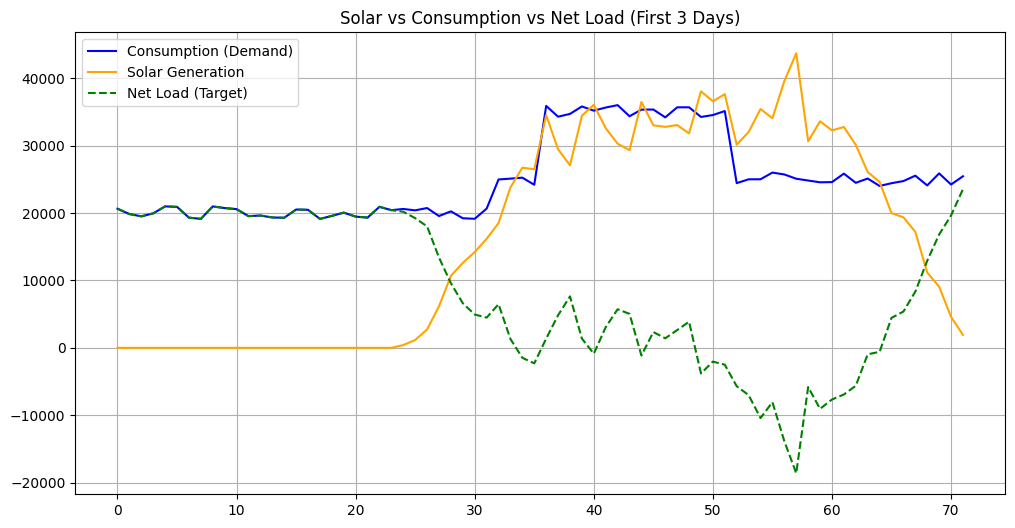

            DATE_TIME  CONSUMPTION  TOTAL_SOLAR  NET_LOAD
0 2020-05-15 00:00:00        20625          0.0   20625.0
1 2020-05-15 00:15:00        19838          0.0   19838.0
2 2020-05-15 00:30:00        19497          0.0   19497.0
3 2020-05-15 00:45:00        19938          0.0   19938.0
4 2020-05-15 01:00:00        20974          0.0   20974.0


In [6]:
# --- 1. Define Demand Simulation Function ---
def simulate_demand(row):
    hour = row['HOUR']
    # Base Demand (Manlo grid par hamesha itna load rehta hai)
    base_load = 20000

    # Morning Peak (9 AM - 12 PM)
    morning_peak = 10000 if 9 <= hour <= 12 else 0

    # Evening Peak (6 PM - 9 PM) - Ye sabse high hota hai
    evening_peak = 15000 if 18 <= hour <= 21 else 0

    # Day Time Activity (General office hours)
    day_load = 5000 if 8 <= hour <= 18 else 0

    # Thoda Random Noise (Taki data fake na lage)
    noise = np.random.randint(-1000, 1000)

    return base_load + morning_peak + evening_peak + day_load + noise

# --- 2. Apply Simulation ---
df_master['CONSUMPTION'] = df_master.apply(simulate_demand, axis=1)

# --- 3. Calculate Net Load ---
# Net Load = Grid Demand - Solar Generation
# Jab Solar high hoga, Net Load kam ho jayega (Duck Curve)
df_master['NET_LOAD'] = df_master['CONSUMPTION'] - df_master['TOTAL_SOLAR']

# --- 4. Visualize (Taaki hum confirm kar sakein ki pattern sahi hai) ---
plt.figure(figsize=(12, 6))
# Sirf pehle 3 din ka data dikhate hain taki graph clear dikhe
subset = df_master[:72]

plt.plot(subset['CONSUMPTION'], label='Consumption (Demand)', color='blue')
plt.plot(subset['TOTAL_SOLAR'], label='Solar Generation', color='orange')
plt.plot(subset['NET_LOAD'], label='Net Load (Target)', color='green', linestyle='--')

plt.title("Solar vs Consumption vs Net Load (First 3 Days)")
plt.legend()
plt.grid(True)
plt.show()

# --- Output Check ---
print(df_master[['DATE_TIME', 'CONSUMPTION', 'TOTAL_SOLAR', 'NET_LOAD']].head())

XGBoost Training shuru... 🚀
Training Complete! ✅

🔥 XGBoost Accuracy (R2 Score): 0.9836


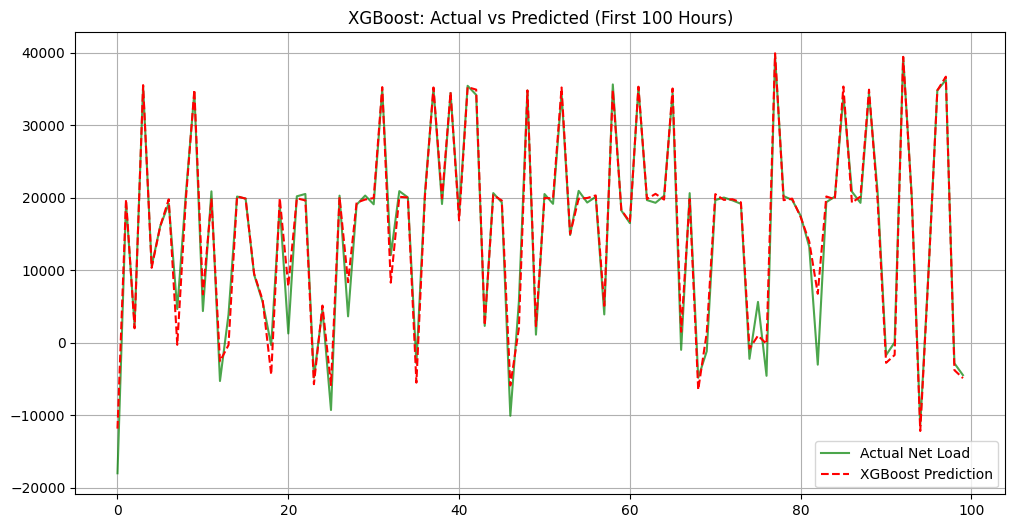

In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Features & Target Define karna ---
features = ['AVG_AMBIENT_TEMP', 'AVG_MODULE_TEMP', 'AVG_IRRADIATION', 'HOUR', 'MONTH', 'DAY_OF_YEAR']
target = 'NET_LOAD'

X = df_master[features]
y = df_master[target]

# --- 2. Data Split (Ye step miss ho gaya tha) ---
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. XGBoost Model Define & Train ---
print("XGBoost Training shuru... 🚀")
model_xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    n_jobs=-1,
    random_state=42
)

model_xgb.fit(X_train, y_train)
print("Training Complete! ✅")

# --- 4. Prediction & Evaluation ---
y_pred_xgb = model_xgb.predict(X_test)
score_xgb = r2_score(y_test, y_pred_xgb)

print(f"\n🔥 XGBoost Accuracy (R2 Score): {score_xgb:.4f}")

# --- 5. Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Net Load', color='green', alpha=0.7)
plt.plot(y_pred_xgb[:100], label='XGBoost Prediction', color='red', linestyle='--')
plt.title("XGBoost: Actual vs Predicted (First 100 Hours)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import joblib

# Model ko save kar rahe hain
joblib.dump(model_xgb, 'solar_net_load_model.pkl')

print("Model saved successfully as 'solar_net_load_model.pkl' ✅")
print("Ab hum is file ko Frontend mein use karenge!")

Model saved successfully as 'solar_net_load_model.pkl' ✅
Ab hum is file ko Frontend mein use karenge!


In [10]:
pip install gradio plotly

In [15]:
import gradio as gr
import pandas as pd
import joblib
import plotly.graph_objects as go
import numpy as np

# --- 1. Load Model ---
# Ensure model file is in the same folder
model = joblib.load('solar_net_load_model.pkl')

# --- 2. Helper Logic (Display ke liye) ---
def estimate_components(hour, irradiation):
    # Solar Approx (Just for visualization)
    est_solar = irradiation * 28000

    # Consumption Approx (Pattern based)
    base_load = 20000
    morning_peak = 10000 if 9 <= hour <= 12 else 0
    evening_peak = 15000 if 18 <= hour <= 21 else 0
    day_load = 5000 if 8 <= hour <= 18 else 0

    est_consumption = base_load + morning_peak + evening_peak + day_load
    return est_solar, est_consumption

# --- 3. Main Prediction Function ---
def predict_net_load(hour, month, day, temp, mod_temp, irradiation):

    # A. Prepare Input for AI Model
    input_data = pd.DataFrame({
        'AVG_AMBIENT_TEMP': [temp],
        'AVG_MODULE_TEMP': [mod_temp],
        'AVG_IRRADIATION': [irradiation],
        'HOUR': [hour],
        'MONTH': [month],
        'DAY_OF_YEAR': [day]
    })

    # B. Get Prediction from XGBoost
    net_load_pred = model.predict(input_data)[0]

    # C. Calculate Components for Display
    solar_val, consumption_val = estimate_components(hour, irradiation)

    # D. Status Text Logic
    if net_load_pred < 0:
        status = f"🟢 SURPLUS POWER: Exporting {-net_load_pred/1000:.2f} MW to Grid"
    else:
        status = f"🔴 GRID LOAD: Importing {net_load_pred/1000:.2f} MW from Grid"

    # E. Generate 24-Hour Graph Data
    hours = list(range(24))
    pred_load = []
    solar_profile = []

    for h in hours:
        temp_input = input_data.copy()
        temp_input['HOUR'] = h

        # Create a realistic daily pattern for the graph
        if h < 6 or h > 18:
            curr_irr = 0
            curr_mod_temp = max(10, temp - 5)
        else:
            # Solar curve logic
            dist = abs(12 - h)
            curr_irr = max(0, irradiation * (1 - dist/6))
            curr_mod_temp = mod_temp

        temp_input['AVG_IRRADIATION'] = curr_irr
        temp_input['AVG_MODULE_TEMP'] = curr_mod_temp

        # Predict for each hour
        p = model.predict(temp_input)[0]
        s, _ = estimate_components(h, curr_irr)

        pred_load.append(p)
        solar_profile.append(s)

    # F. Build Elite Plotly Graph
    fig = go.Figure()

    # Line 1: Solar Generation (Yellow Dotted)
    fig.add_trace(go.Scatter(
        x=hours, y=solar_profile, name='Solar Gen',
        line=dict(color='#FDB813', width=3, dash='dot')
    ))

    # Line 2: Net Load (Neon Cyan Filled)
    fig.add_trace(go.Scatter(
        x=hours, y=pred_load, name='Net Load',
        line=dict(color='#00ffcc', width=4),
        fill='tozeroy',
        fillcolor='rgba(0, 255, 204, 0.1)'
    ))

    fig.update_layout(
        title="<b>24-Hour Forecast Analysis</b>",
        xaxis_title="Time of Day",
        yaxis_title="Power (kW)",
        template="plotly_dark",
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode="x unified",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    return (
        f"{consumption_val:.0f} kW",
        f"{solar_val:.0f} kW",
        f"{net_load_pred:.2f} kW",
        status,
        fig
    )

# --- 4. Gradio Interface Setup ---
theme = gr.themes.Soft(
    primary_hue="cyan",
    secondary_hue="slate",
).set(
    body_background_fill="#0b0f19",
    block_background_fill="#111827",
    body_text_color="#e5e7eb",
    block_title_text_color="#00ffcc",
    slider_color="#00ffcc"
)

with gr.Blocks(theme=theme, title="Advanced Net Load AI") as demo:
    gr.Markdown(
        """
        # ⚡ Advanced Net Load Forecasting AI
        ### Smart Grid Management System using XGBoost
        """
    )

    with gr.Row():
        # --- LEFT COLUMN: FULL CONTROLS (Wapas aa gaye!) ---
        with gr.Column(scale=1, min_width=320):
            gr.Markdown("### 📅 Time Parameters")
            s_hour = gr.Slider(0, 23, value=12, step=1, label="Hour of Day ⏰")
            s_month = gr.Slider(1, 12, value=5, step=1, label="Month 📅")
            s_day = gr.Slider(1, 365, value=136, step=1, label="Day of Year 📆")

            gr.Markdown("---")
            gr.Markdown("### ☀️ Weather Conditions")
            s_irr = gr.Slider(0.0, 1.2, value=0.8, step=0.01, label="Irradiation (kW/m²) ☀️")
            s_temp = gr.Slider(0, 50, value=30, step=1, label="Ambient Temp (°C) 🌡️")
            s_mod_temp = gr.Slider(0, 80, value=50, step=1, label="Module Temp (°C) 🔥")

            gr.Markdown("*Adjust sliders to simulate different grid scenarios.*")

        # --- RIGHT COLUMN: VISUALIZATION ---
        with gr.Column(scale=2):
            gr.Markdown("### 📊 Real-Time Grid Analytics")

            # The 3-Box Layout
            with gr.Row():
                out_cons = gr.Textbox(label="🏙️ Est. Consumption", text_align="center")
                out_solar = gr.Textbox(label="☀️ Est. Solar Gen", text_align="center")
                out_net = gr.Textbox(label="⚡ Predicted Net Load", text_align="center")

            # Status Bar
            out_status = gr.Textbox(label="System Status", text_align="center")

            # Graph
            out_plot = gr.Plot(label="Forecast Trend")

    # --- 5. Logic Connections ---
    inputs = [s_hour, s_month, s_day, s_temp, s_mod_temp, s_irr]
    outputs = [out_cons, out_solar, out_net, out_status, out_plot]

    # Live Updates
    for inp in inputs:
        inp.change(fn=predict_net_load, inputs=inputs, outputs=outputs)

    # Initial Load
    demo.load(fn=predict_net_load, inputs=inputs, outputs=outputs)

# --- 6. Launch ---
if __name__ == "__main__":
    demo.launch()

/tmp/ipython-input-801556845.py:127: DeprecationWarning:

The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.



It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6b2283d59af9dc2a4d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
import gradio as gr
import pandas as pd
import joblib
import plotly.graph_objects as go
import numpy as np

# --- 1. Load Model ---
model = joblib.load('solar_net_load_model.pkl')

# --- 2. Helper Logic ---
def estimate_components(hour, irradiation):
    est_solar = irradiation * 28000
    base_load = 20000
    morning_peak = 10000 if 9 <= hour <= 12 else 0
    evening_peak = 15000 if 18 <= hour <= 21 else 0
    day_load = 5000 if 8 <= hour <= 18 else 0
    est_consumption = base_load + morning_peak + evening_peak + day_load
    return est_solar, est_consumption

# --- 3. Main Logic ---
def predict_net_load(hour, month, day, temp, mod_temp, irradiation):

    # Input Data
    input_data = pd.DataFrame({
        'AVG_AMBIENT_TEMP': [temp],
        'AVG_MODULE_TEMP': [mod_temp],
        'AVG_IRRADIATION': [irradiation],
        'HOUR': [hour],
        'MONTH': [month],
        'DAY_OF_YEAR': [day]
    })

    # Prediction
    net_load_pred = model.predict(input_data)[0]

    # Components
    solar_val, consumption_val = estimate_components(hour, irradiation)

    # Status
    if net_load_pred < 0:
        status = f"🟢 SURPLUS POWER: Exporting {-net_load_pred/1000:.2f} MW"
    else:
        status = f"🔴 GRID LOAD: Importing {net_load_pred/1000:.2f} MW"

    # Graph Data (24H)
    hours = list(range(24))
    pred_load = []
    solar_profile = []

    for h in hours:
        temp_input = input_data.copy()
        temp_input['HOUR'] = h

        if h < 6 or h > 18:
            curr_irr = 0
            curr_mod_temp = max(10, temp - 5)
        else:
            dist = abs(12 - h)
            curr_irr = max(0, irradiation * (1 - dist/6))
            curr_mod_temp = mod_temp

        temp_input['AVG_IRRADIATION'] = curr_irr
        temp_input['AVG_MODULE_TEMP'] = curr_mod_temp

        p = model.predict(temp_input)[0]
        s, _ = estimate_components(h, curr_irr)
        pred_load.append(p)
        solar_profile.append(s)

    # --- PLOT FIX HERE ---
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=hours, y=solar_profile, name='Solar Gen',
        line=dict(color='#FDB813', width=3, dash='dot')
    ))

    fig.add_trace(go.Scatter(
        x=hours, y=pred_load, name='Net Load',
        line=dict(color='#00ffcc', width=4),
        fill='tozeroy',
        fillcolor='rgba(0, 255, 204, 0.1)'
    ))

    fig.update_layout(
        title="<b>24-Hour Forecast Analysis</b>",
        xaxis_title="Time of Day",
        yaxis_title="Power (kW)",
        template="plotly_dark",
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode="x unified",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),

        # --- YE RAHA FIX ---
        hoverlabel=dict(
            bgcolor="#1f2937",    # Dark Grey Background
            font=dict(color="white"), # Pure White Text
            bordercolor="#00ffcc" # Neon Cyan Border
        )
    )

    return (
        f"{consumption_val:.0f} kW",
        f"{solar_val:.0f} kW",
        f"{net_load_pred:.2f} kW",
        status,
        fig
    )

# --- 4. UI Setup ---
theme = gr.themes.Soft(
    primary_hue="cyan",
    secondary_hue="slate",
).set(
    body_background_fill="#0b0f19",
    block_background_fill="#111827",
    body_text_color="#e5e7eb",
    block_title_text_color="#00ffcc",
    slider_color="#00ffcc"
)

with gr.Blocks(theme=theme, title="Advanced Net Load AI") as demo:
    gr.Markdown("# ⚡ Advanced Net Load Forecasting AI")

    with gr.Row():
        with gr.Column(scale=1, min_width=320):
            gr.Markdown("### 📅 Time Parameters")
            s_hour = gr.Slider(0, 23, value=12, step=1, label="Hour of Day ⏰")
            s_month = gr.Slider(1, 12, value=5, step=1, label="Month 📅")
            s_day = gr.Slider(1, 365, value=136, step=1, label="Day of Year 📆")
            gr.Markdown("---")
            gr.Markdown("### ☀️ Weather Conditions")
            s_irr = gr.Slider(0.0, 1.2, value=0.8, step=0.01, label="Irradiation (kW/m²) ☀️")
            s_temp = gr.Slider(0, 50, value=30, step=1, label="Ambient Temp (°C) 🌡️")
            s_mod_temp = gr.Slider(0, 80, value=50, step=1, label="Module Temp (°C) 🔥")

        with gr.Column(scale=2):
            gr.Markdown("### 📊 Real-Time Grid Analytics")
            with gr.Row():
                out_cons = gr.Textbox(label="🏙️ Est. Consumption", text_align="center")
                out_solar = gr.Textbox(label="☀️ Est. Solar Gen", text_align="center")
                out_net = gr.Textbox(label="⚡ Predicted Net Load", text_align="center")
            out_status = gr.Textbox(label="System Status", text_align="center")
            out_plot = gr.Plot(label="Forecast Trend")

    inputs = [s_hour, s_month, s_day, s_temp, s_mod_temp, s_irr]
    outputs = [out_cons, out_solar, out_net, out_status, out_plot]

    for inp in inputs:
        inp.change(fn=predict_net_load, inputs=inputs, outputs=outputs)

    demo.load(fn=predict_net_load, inputs=inputs, outputs=outputs)

if __name__ == "__main__":
    demo.launch()

/tmp/ipython-input-1017705955.py:123: DeprecationWarning:

The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.



It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b04fd623aa0718c0d2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


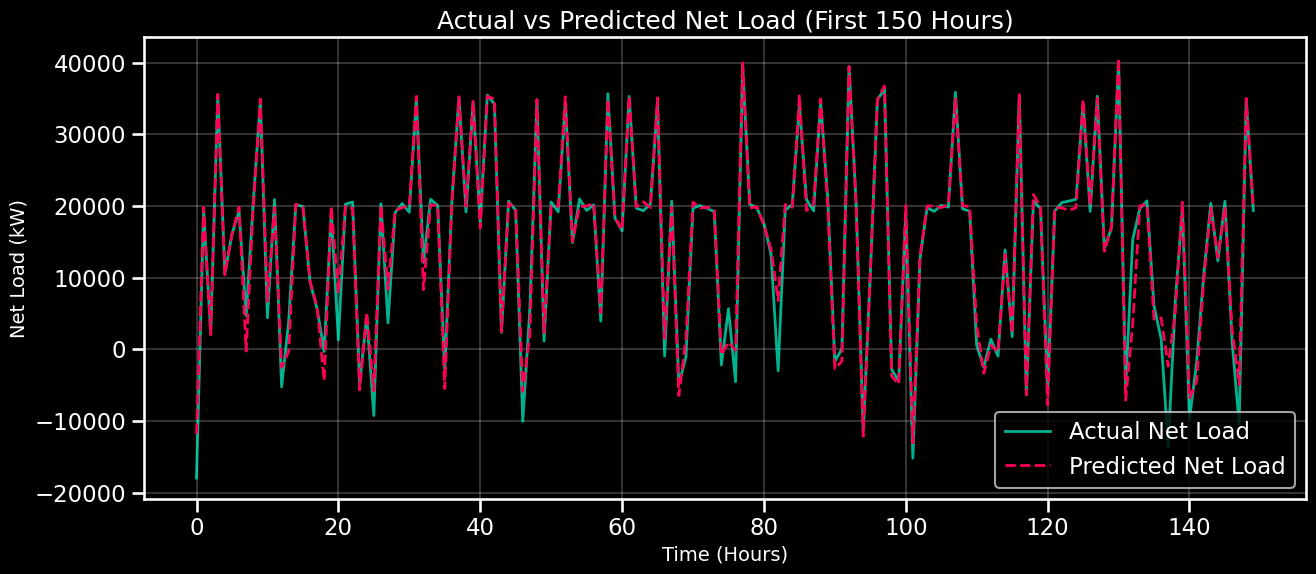

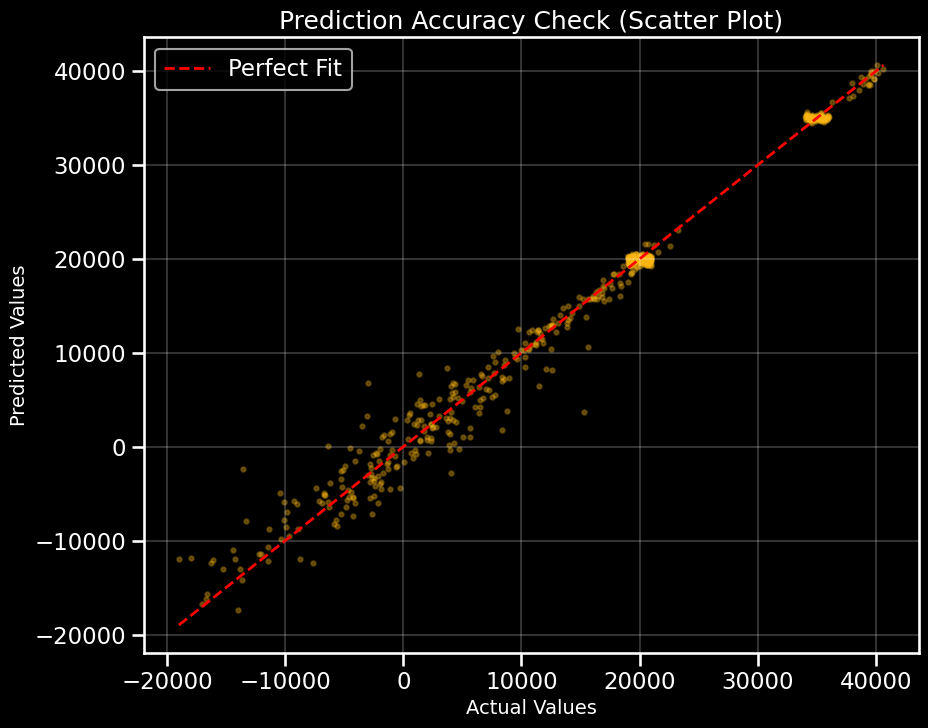

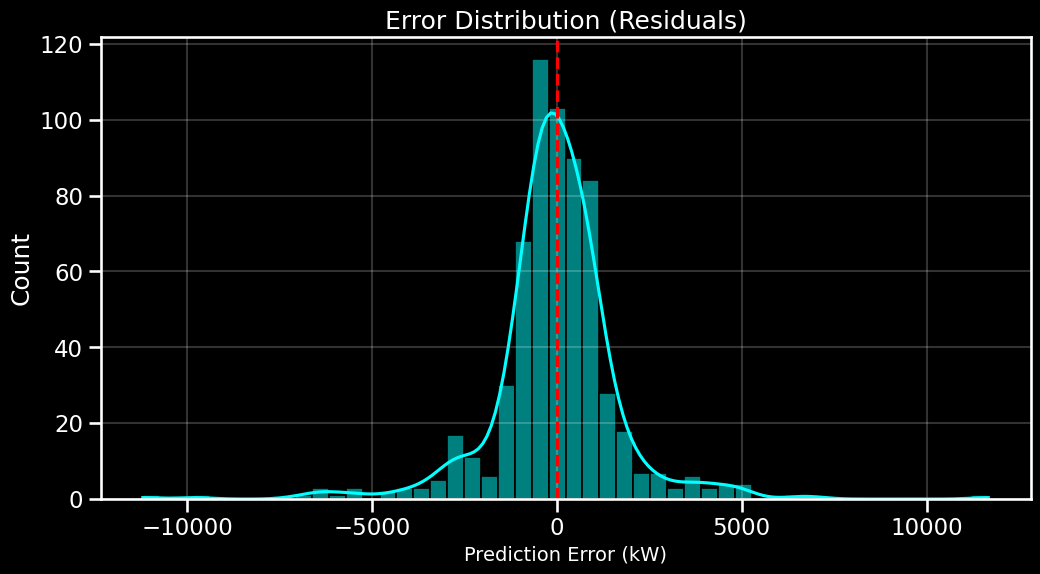

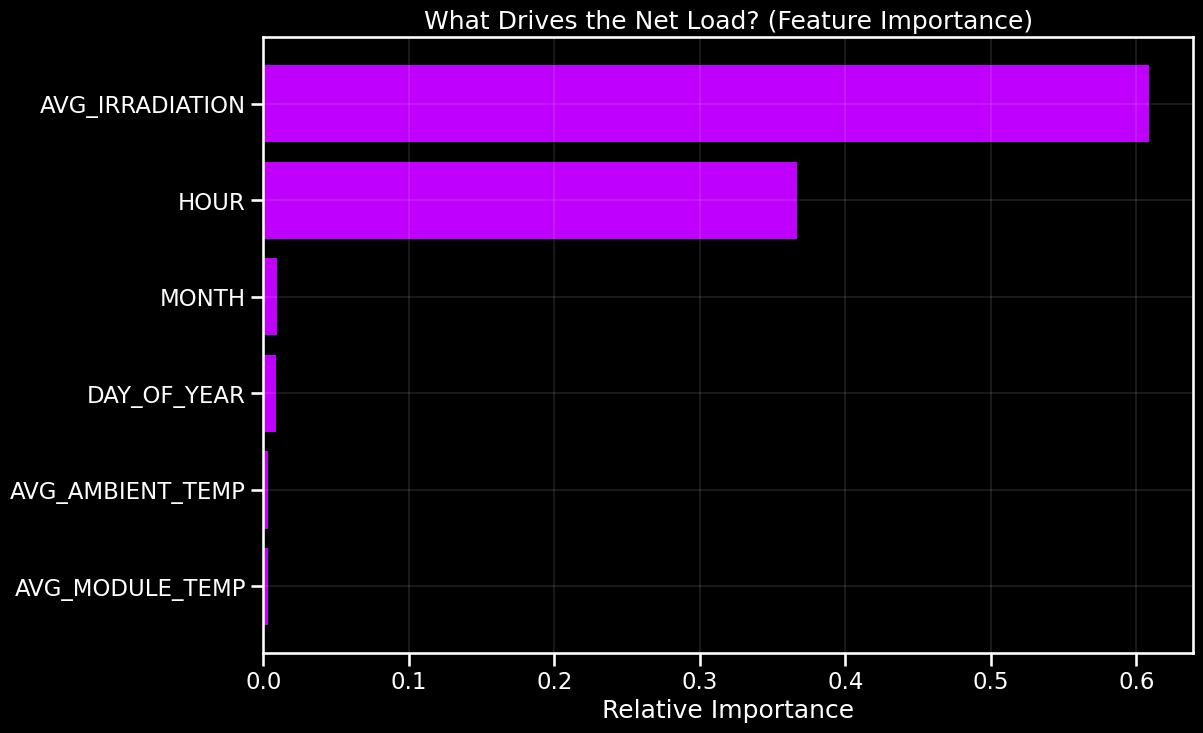

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 0. Setup Elite Theme ---
plt.style.use('dark_background') # Dark theme for Elite look
sns.set_context("talk") # Bigger fonts for presentation

# --- 1. Actual vs Predicted Net Load (Time Series) ---
plt.figure(figsize=(15, 6))
# Sirf pehle 150 hours dikha rahe hain taaki kichdi na bane
subset_len = 150
plt.plot(y_test.values[:subset_len], label='Actual Net Load', color='#00ffcc', alpha=0.7, linewidth=2)
plt.plot(y_pred_xgb[:subset_len], label='Predicted Net Load', color='#ff0055', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Net Load (First 150 Hours)', fontsize=18, color='white')
plt.xlabel('Time (Hours)', fontsize=14)
plt.ylabel('Net Load (kW)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.2)
plt.savefig('1_Actual_vs_Predicted_TimeSeries.png') # Save kar rahe hain
plt.show()

# --- 2. Actual vs Predicted Scatter Plot ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='#FDB813', s=10)

# Perfect prediction line (y=x)
min_val = min(y_test.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit')

plt.title('Prediction Accuracy Check (Scatter Plot)', fontsize=18)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.2)
plt.savefig('2_Actual_vs_Pred_Scatter.png')
plt.show()

# --- 3. Residual Histogram (Error Distribution) ---
residuals = y_test - y_pred_xgb
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True, color='cyan', edgecolor='black')

plt.title('Error Distribution (Residuals)', fontsize=18)
plt.xlabel('Prediction Error (kW)', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--') # Zero Error Line
plt.grid(True, alpha=0.2)
plt.savefig('3_Residual_Histogram.png')
plt.show()

# --- 4. Feature Importance (XGBoost) ---
plt.figure(figsize=(12, 8))
# Get importance
importance = model_xgb.feature_importances_
feature_names = X_train.columns

# Sort features
indices = np.argsort(importance)

plt.barh(range(len(indices)), importance[indices], color='#bf00ff', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('What Drives the Net Load? (Feature Importance)', fontsize=18)
plt.grid(True, alpha=0.1)
plt.savefig('4_Feature_Importance.png')
plt.show()

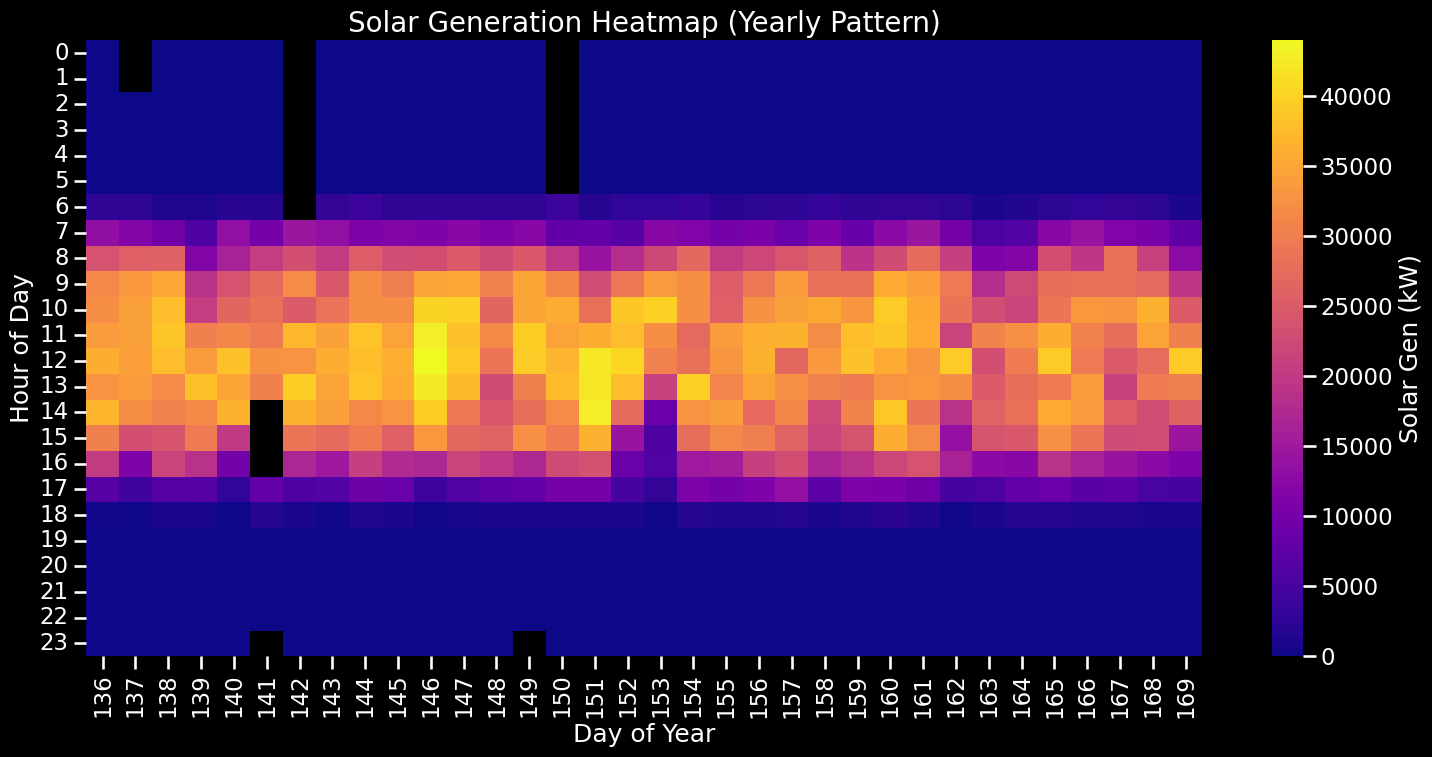

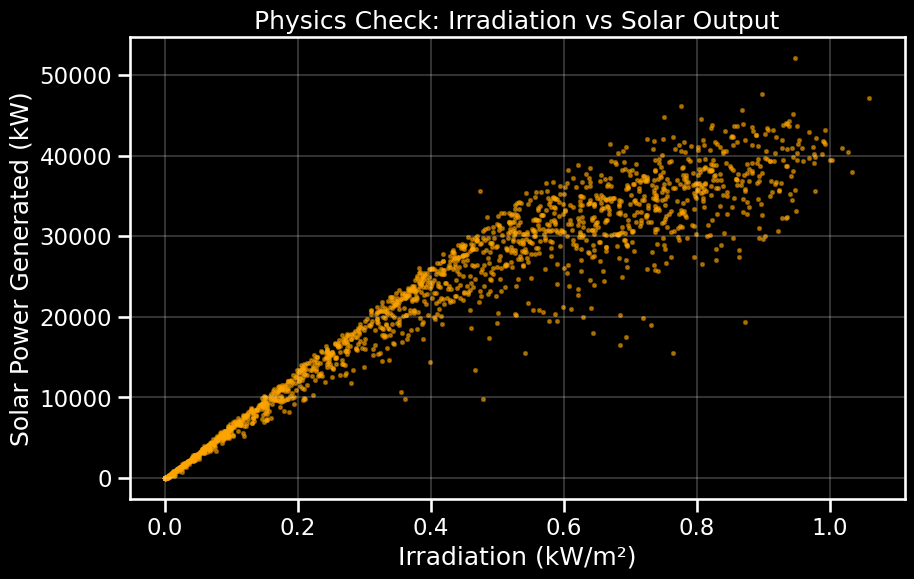

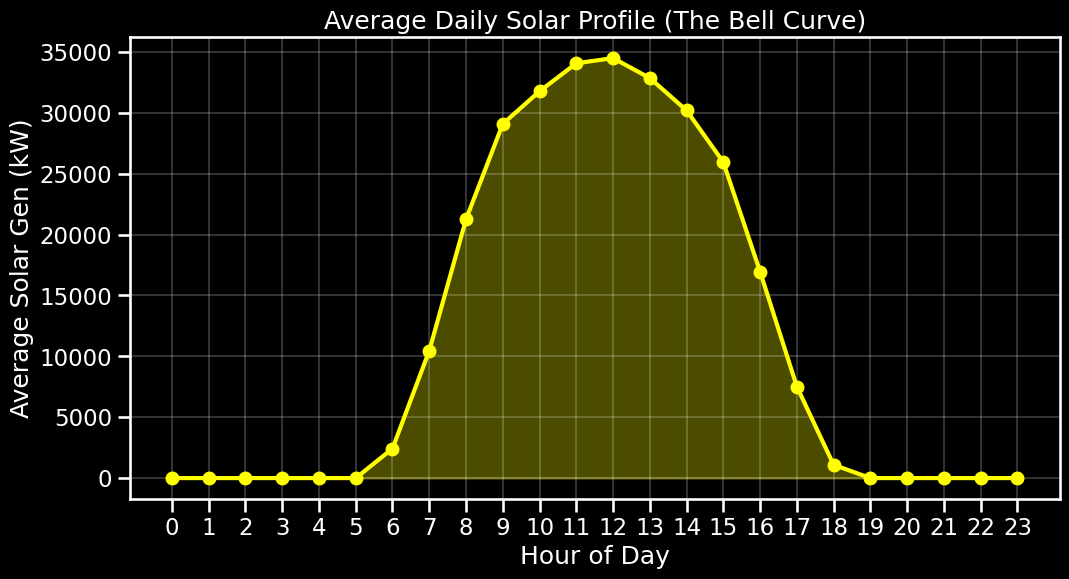

In [18]:
# --- 5. Heatmap of Solar Generation (Hour vs Day) ---
# Data ko Pivot karna padega heatmap ke liye
# Hum master df use karenge
pivot_table = df_master.pivot_table(values='TOTAL_SOLAR', index='HOUR', columns='DAY_OF_YEAR', aggfunc='mean')

plt.figure(figsize=(18, 8))
sns.heatmap(pivot_table, cmap='plasma', cbar_kws={'label': 'Solar Gen (kW)'})
plt.title('Solar Generation Heatmap (Yearly Pattern)', fontsize=20)
plt.xlabel('Day of Year')
plt.ylabel('Hour of Day')
plt.savefig('5_Solar_Heatmap.png')
plt.show()

# --- 6. Irradiation vs Solar Power Scatter ---
plt.figure(figsize=(10, 6))
plt.scatter(df_master['AVG_IRRADIATION'], df_master['TOTAL_SOLAR'], alpha=0.5, color='orange', s=5)
plt.title('Physics Check: Irradiation vs Solar Output', fontsize=18)
plt.xlabel('Irradiation (kW/m²)')
plt.ylabel('Solar Power Generated (kW)')
plt.grid(True, alpha=0.2)
plt.savefig('6_Irradiation_vs_Power.png')
plt.show()

# --- 7. Average Solar Curve (Bell Curve) ---
hourly_solar = df_master.groupby('HOUR')['TOTAL_SOLAR'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_solar.index, hourly_solar.values, color='yellow', linewidth=3, marker='o')
plt.fill_between(hourly_solar.index, hourly_solar.values, color='yellow', alpha=0.3)
plt.title('Average Daily Solar Profile (The Bell Curve)', fontsize=18)
plt.xlabel('Hour of Day')
plt.ylabel('Average Solar Gen (kW)')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.2)
plt.savefig('7_Solar_Bell_Curve.png')
plt.show()

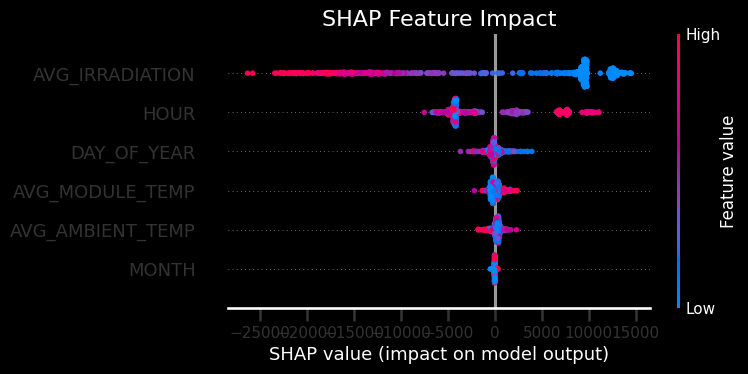

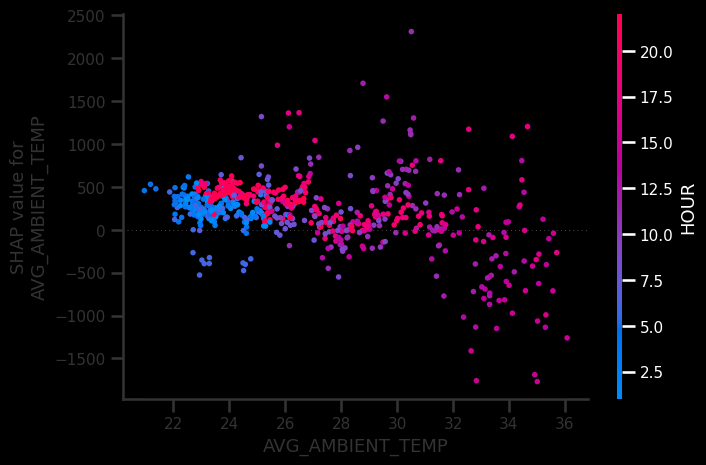

In [20]:
import shap

# SHAP Explainer banate hain
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_test)

# --- 8. SHAP Summary Plot (Beeswarm) ---
plt.figure() # New figure
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Feature Impact', fontsize=16)
plt.savefig('8_SHAP_Summary.png', bbox_inches='tight')
plt.show()

# --- 9. SHAP Dependence Plot (Temp vs Load) ---
# Ye dikhayega Temperature ka Net Load par kya asar hai
shap.plots.scatter(shap_values[:,"AVG_AMBIENT_TEMP"], color=shap_values)